In [103]:
import numpy as np
def step(x):

    output = np.where(x >= 0, 1, 0)

    return output

def sigmoid(x):

    output = 1 / (1 + np.exp(-x))

    return output

def relu(x):

    output = np.maximum(0, x)

    return output

In [104]:
from typing import Callable

class Perceptron:
    def __init__(self, input_size: int, learning_rate: float = 0.1, activation_function: Callable = sigmoid):
        self.weights = np.random.rand(input_size)  # Initialize weights randomly
        self.bias = np.random.rand(1)  # Initialize bias randomly
        self.learning_rate = learning_rate
        self.activation_function = activation_function

    def predict(self, x):
        # Compute the weighted sum of inputs by applying a numpy dot product between x and the weights
        weighted_sum = np.dot(x, self.weights) # here i am computing the dot product to get the weight with numpy np dot

        # Add the bias to the weighted sum

        weighted_sum += self.bias # now i am going ahead and adding a bias which is initially set randomly 

        # Apply the activation function to the weighted sum

        output = self.activation_function(weighted_sum) # finally i wil go ahead and add the activation with having the weighted sum parameter

        return output

    def train(self, X, y, epochs: int = 100):
        for epoch in range(epochs):
            for xi, yi in zip(X, y):
                # predict the output for the given input
                prediction = self.predict(xi) # here i am doing the calculation of one forward pass based on the xi input

                # calculate the error between expected and predicted output (expected - predicted)
                error = yi - prediction # now i am utilizing the expected yi that i have and subtracting that with what i predicted above

                # multiply the error by the learning rate to get our adjustment
                adjustment = error * self.learning_rate # here i am multiplying the learning rate and then the error

                # update the weights by adding the adjustment multiplied by the original input
                self.weights += (xi * adjustment) # now i am updating the weight for each of the features

                # update the bias by adding the adjustment
                self.bias += adjustment # here i am simply adding the adjustment to reduce the error properly

In [5]:
# Simple test example. We have 3 inputs, and we want to predict 1 if there are at least two 1s in the inputs, otherwise 0.
np.random.seed(11)  # For reproducibility
X = np.array([ [0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]])
y = np.array([0, 0, 0, 1, 0, 1, 1, 1])  # Expected output

perceptron = Perceptron(input_size=3, learning_rate=0.1, activation_function=step)
perceptron.train(X, y, epochs=100)

# Test the perceptron with the training data
for i, xi in enumerate(X):
    print(f"Input: {xi}, Predicted Output: {perceptron.predict(xi), 'Expected Output:', y[i]}")

Input: [0 0 0], Predicted Output: (array([0]), 'Expected Output:', np.int64(0))
Input: [0 0 1], Predicted Output: (array([0]), 'Expected Output:', np.int64(0))
Input: [0 1 0], Predicted Output: (array([0]), 'Expected Output:', np.int64(0))
Input: [0 1 1], Predicted Output: (array([1]), 'Expected Output:', np.int64(1))
Input: [1 0 0], Predicted Output: (array([0]), 'Expected Output:', np.int64(0))
Input: [1 0 1], Predicted Output: (array([1]), 'Expected Output:', np.int64(1))
Input: [1 1 0], Predicted Output: (array([1]), 'Expected Output:', np.int64(1))
Input: [1 1 1], Predicted Output: (array([1]), 'Expected Output:', np.int64(1))


In [101]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

torch.manual_seed(11)  # For reproducibility
np.random.seed(11)  # For reproducibility

class SingleLayerPerceptron(nn.Module):
    def __init__(self, input_size, output_size, activation_function=torch.sigmoid):
        super().__init__()
        # Define a single linear layer of perceptrons with the specified input and output sizes
        self.layer = nn.Linear(input_size, output_size)

        # Set the activation function. Torch comes with many built-in activation functions, such as torch.relu, torch.sigmoid, torch.tanh, etc. You can also define your own activation function if needed.
        self.activation_function = activation_function

    def forward(self, x):
        # We can apply a layer to the input, simply by calling it like a function
        x = self.layer(x) # here i am properly adding the linear layer with x for the forward pass

        # Then, we can do the same with the activation function
        x = self.activation_function(x) # now i am doing the same with applying activation function to the x for the forward pass

        return x

# Example usage
X = np.array([ [0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]])
y = np.array([0, 0, 0, 1, 0, 1, 1, 1])  # Expected output

# We must first convert our numpy arrays to torch tensors, as PyTorch works with tensors (which are similar to numpy arrays, but have some nice features such as GPU support)
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1) # .view(-1, 1) reshapes the tensor to have a single column, as opposed to a single row.

# Define the model
input_size = X_tensor.shape[1]  # Number of features in the input
output_size = y_tensor.shape[1]  # Number of outputs (in this case, 1 for binary classification)

# define out model with the input size, output size, and the sigmoid activation function
model = SingleLayerPerceptron(input_size, output_size, activation_function=torch.sigmoid) # now I will use the singel layer perceptrion class that i created to define the model and then i will include the three parameters

# Define a loss function and an optimizer
# Binary Cross Entropy Loss, commonly used for binary classification tasks. In this case, we are using it because our output is binary (0 or 1).
loss_function = nn.BCELoss()
# Stochastic Gradient Descent optimizer with a learning rate of 0.1. As you may notice, we pass in the model's parameters to the optimizer as a reference, allowing the optimizer to update the model's weights during training.
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Training loop
epochs = 100
for epoch in range(epochs):
    # Compute the model's predictions, simply by calling the model as a function, passing in the input tensor
    predictions = model(X_tensor) # here i am goign ahead and passing in X_tensor into the model

    # Calculate the loss between the predictions and the expected output, by calling the loss function with the predictions and the expected output tensor
    loss = loss_function(predictions, y_tensor) # now i am going ahead and passing in the predictions and expected output into the loss function

    # Zero the gradients before the backward pass by calling the optimizer's `zero_grad()` function
    optimizer.zero_grad() # here i am zeroing gradients before backward passing with optimizer

    # Have the loss function calculate the backwards pass, which computes the gradients of loss with respect to the model's parameters. simply call the loss's `backward()` function
    loss.backward() # here i am calling the backward pass
    
    # Update the model's weights by calling the optimizer's `step()` function
    optimizer.step() # here i am calling step to update the model weights for the optimzer
    
    # Print the loss every 10 epochs
    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# Test the perceptron with the training data
with torch.no_grad():
    for i, xi in enumerate(X):
        xi_tensor = torch.tensor(xi, dtype=torch.float32)
        output = model(xi_tensor)
        pred = int(output >= 0.6)
        print(f"Input: {xi}, Predicted Output: {pred, 'Expected Output:', y[i]}")

Epoch 0, Loss: 0.7023134231567383
Epoch 10, Loss: 0.6395115852355957
Epoch 20, Loss: 0.6031923294067383
Epoch 30, Loss: 0.5780108571052551
Epoch 40, Loss: 0.5578776597976685
Epoch 50, Loss: 0.540375828742981
Epoch 60, Loss: 0.5245052576065063
Epoch 70, Loss: 0.5098204016685486
Epoch 80, Loss: 0.49609947204589844
Epoch 90, Loss: 0.48321422934532166
Input: [0 0 0], Predicted Output: (0, 'Expected Output:', np.int64(0))
Input: [0 0 1], Predicted Output: (0, 'Expected Output:', np.int64(0))
Input: [0 1 0], Predicted Output: (0, 'Expected Output:', np.int64(0))
Input: [0 1 1], Predicted Output: (1, 'Expected Output:', np.int64(1))
Input: [1 0 0], Predicted Output: (0, 'Expected Output:', np.int64(0))
Input: [1 0 1], Predicted Output: (1, 'Expected Output:', np.int64(1))
Input: [1 1 0], Predicted Output: (1, 'Expected Output:', np.int64(1))
Input: [1 1 1], Predicted Output: (1, 'Expected Output:', np.int64(1))


In [102]:
class MultilayerPerceptron(nn.Module):
    def __init__(self, input_size: int = 2, hidden_sizes: list = [], output_size: int = 1, activation_functions: list = [nn.Sigmoid]):
        super().__init__()

        # create a list to hold the layers
        layers = []

        # Let's start by creating our input layer. Create a linear layer with the input size of `input_size`, and the output size of either the first hidden layer size if it exists, or the output size if it does not.
        layers.append(nn.Linear(input_size, hidden_sizes[0] if hidden_sizes else output_size))

        # Then, we can add the activation function for the input layer. Use the first activation function from the `activation_functions` list.
        layers.append(activation_functions[0]())

        # If there are no hidden layers, we can stop the model here and combine our layers list into a sequential model
        if not hidden_sizes:
            self.model = nn.Sequential(*layers)
            return

        # Now that we know we have at least one hidden layer, we can loop through the hidden sizes and create a linear layer for each hidden layer size.
        # To make this easier, we will firstly append the output size to the end of the hidden sizes list, so we can loop through it and create the layers in one go.
        hidden_sizes.append(output_size)
        # Iterate through all hidden sizes except the last one.
        for i in range(len(hidden_sizes) - 1):
            # Create a linear layer with an input size of the current hidden layer size, and an output size of the next hidden layer size. Append this layer to the layers list.
            layers.append(nn.Linear(hidden_sizes[i], hidden_sizes[i + 1]))

            # Then, we can add the activation function for the current hidden layer. Use the next activation function from the `activation_functions` list. if i=0, use activation_functions[1]
            layers.append(activation_functions[i + 1]())

        # Now that we have created all the layers, we can combine them into a sequential model
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        # We can apply the model to the input, simply by calling it like a function
        return self.model(x)  # Apply our sequential model to the input x

# Example usage
X = np.array([ [0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]])
y = np.array([0, 0, 0, 1, 0, 1, 1, 1])  # Expected output

# We must first convert our numpy arrays to torch tensors, as PyTorch works with tensors (which are similar to numpy arrays, but have some nice features such as GPU support)
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1) # .view(-1, 1) reshapes the tensor to have a single column, as opposed to a single row.

# Define the model
input_size = X_tensor.shape[1]  # Number of features in the input
output_size = y_tensor.shape[1]  # Number of outputs (in this case, 1 for binary classification)

# define out model with the input size, output size, and the sigmoid activation function
# here i am going to define the model with uisng the multi layer perceptrion, with the input size
# output siez and sigmoid activitate function
model = MultilayerPerceptron(input_size, [], output_size, activation_functions=[nn.Sigmoid])


# Define a loss function and an optimizer
# Binary Cross Entropy Loss, commonly used for binary classification tasks. In this case, we are using it because our output is binary (0 or 1).
loss_function = nn.BCELoss()
# Stochastic Gradient Descent optimizer with a learning rate of 0.1. As you may notice, we pass in the model's parameters to the optimizer as a reference, allowing the optimizer to update the model's weights during training.
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Training loop
epochs = 100
for epoch in range(epochs):
    # Compute the model's predictions, simply by calling the model as a function, passing in the input tensor
    predictions = model(X_tensor) # here i am goign ahead and passing in X_tensor into the model

    # Calculate the loss between the predictions and the expected output, by calling the loss function with the predictions and the expected output tensor
    loss = loss_function(predictions, y_tensor) # now i am going ahead and passing in the predictions and expected output into the loss function

    # Zero the gradients before the backward pass by calling the optimizer's `zero_grad()` function
    optimizer.zero_grad() # here i am zeroing gradients before backward passing with optimizer

    # Have the loss function calculate the backwards pass, which computes the gradients of loss with respect to the model's parameters. simply call the loss's `backward()` function
    loss.backward() # here i am calling the backward pass
    
    # Update the model's weights by calling the optimizer's `step()` function
    optimizer.step() # here i am calling step to update the model weights for the optimzer

    # Print the loss every 10 epochs
    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# Test the perceptron with the training data
with torch.no_grad():
    for i, xi in enumerate(X):
        xi_tensor = torch.tensor(xi, dtype=torch.float32)
        output = model(xi_tensor)
        pred = int(output >= 0.6)
        print(f"Input: {xi}, Predicted Output: {pred, 'Expected Output:', y[i]}")

Epoch 0, Loss: 0.6492931246757507
Epoch 10, Loss: 0.6004298329353333
Epoch 20, Loss: 0.5713237524032593
Epoch 30, Loss: 0.5503485798835754
Epoch 40, Loss: 0.5330766439437866
Epoch 50, Loss: 0.5177822709083557
Epoch 60, Loss: 0.5037550330162048
Epoch 70, Loss: 0.49067679047584534
Epoch 80, Loss: 0.478386253118515
Epoch 90, Loss: 0.4667874872684479
Input: [0 0 0], Predicted Output: (0, 'Expected Output:', np.int64(0))
Input: [0 0 1], Predicted Output: (0, 'Expected Output:', np.int64(0))
Input: [0 1 0], Predicted Output: (0, 'Expected Output:', np.int64(0))
Input: [0 1 1], Predicted Output: (1, 'Expected Output:', np.int64(1))
Input: [1 0 0], Predicted Output: (0, 'Expected Output:', np.int64(0))
Input: [1 0 1], Predicted Output: (1, 'Expected Output:', np.int64(1))
Input: [1 1 0], Predicted Output: (1, 'Expected Output:', np.int64(1))
Input: [1 1 1], Predicted Output: (1, 'Expected Output:', np.int64(1))


Based on the data here as well as the results, I see that for the single layer model it is linearly separable, and because of that the model drops in terms of the loss rate. For the multi layer model, it has more like the hidden lists and the multiple activation functions, which adds more complexity to the model. Because of this, the learning rate is slower and thus that means that the loss rate will be even more steeper. So with that, the multi layer model is better in terms of loss rate decrease and it converges faster compared to the single layer model.

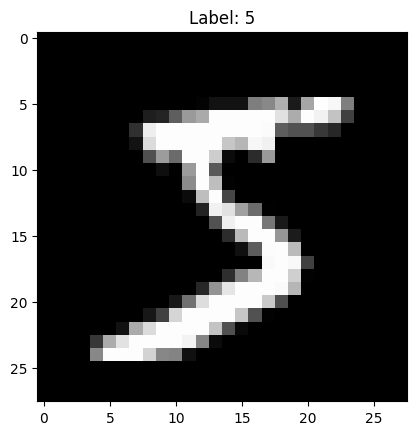

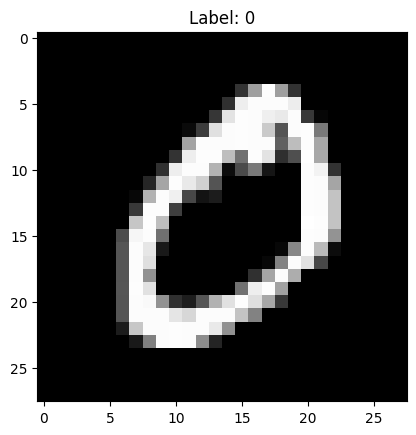

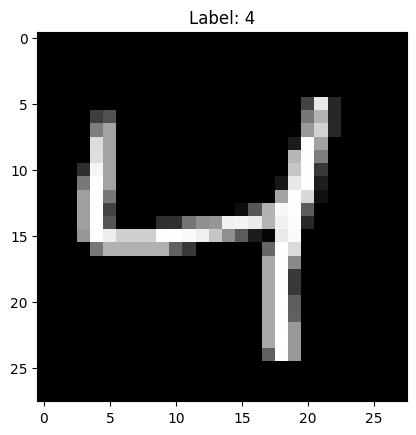

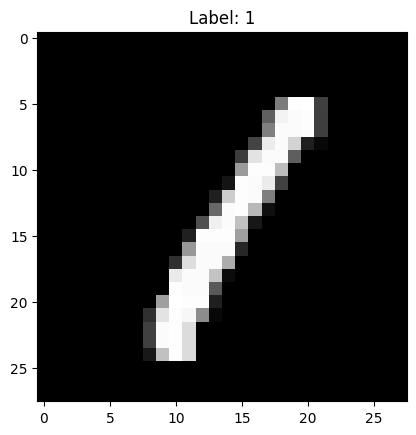

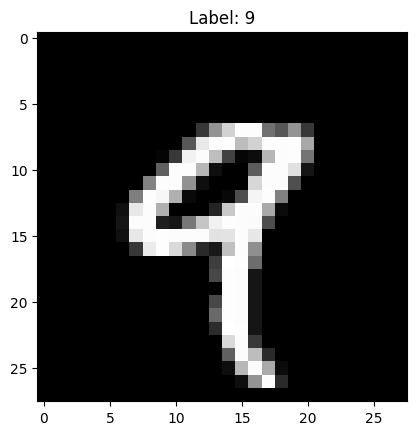

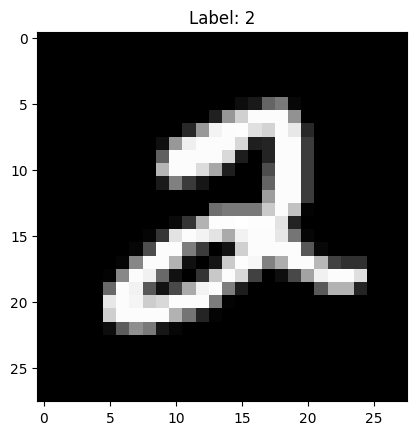

In [33]:
import pandas as pd
train_data = pd.read_csv('/anvil/projects/tdm/data/mnist/mnist_train.csv')
test_data = pd.read_csv('/anvil/projects/tdm/data/mnist/mnist_test.csv')

# convert these rows into 2D image arrays to display, and a dataframe of labels
train_images = train_data.iloc[:, 1:].values.reshape(-1, 28, 28)
train_labels = train_data.iloc[:, 0].values

# we can use matplotlib to visualize the images
import matplotlib.pyplot as plt
plt.imshow(train_images[0], cmap='gray')
plt.title(f'Label: {train_labels[0]}')
plt.show()

# now after the train images are reshaped i will go ahead and display some more images from the dataset by going through in a for loop
n = 5 # amount of images i want to go through
for i in range(1, n + 1): # going through images labeled with 1 to 5 within the train images and labels
    plt.imshow(train_images[i], cmap='gray') # showing the image
    plt.title(f'Label: {train_labels[i]}') # adding the label accordingly
    plt.show()

In [37]:
print(len(np.unique(train_labels))) # now finding out unique labels in dataset and i am doing so with np.unique to find unique elements

10


10 unique labels, (28, 28) size, input size of 784, output size is 10

The best activation function would a softmax activation because there are single labels, but there are a total of 10 unique of them so each of them represent their own class, and the classification is for multiple classes. The outputs are normalized into a probability distribution which makes it easier to classify the image.

In [40]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

train = pd.read_csv('/anvil/projects/tdm/data/mnist/mnist_train.csv')
test = pd.read_csv('/anvil/projects/tdm/data/mnist/mnist_test.csv')

X_train = torch.tensor(train.iloc[:, 1:].values, dtype=torch.float32) / 255.0  # Normalize pixel values to [0, 1] and convert to tensor
y_train = torch.tensor(train.iloc[:, 0].values, dtype=torch.long)  # Convert labels to tensor
X_test = torch.tensor(test.iloc[:, 1:].values, dtype=torch.float32) / 255.0  # Normalize pixel values to [0, 1]
y_test = torch.tensor(test.iloc[:, 0].values, dtype=torch.long)  # Convert labels to tensor

In [56]:
# here i am going ahead and defining the inptu and output size for my model
input_size = X_train.shape[1]   
output_size = 10

class MultilayerPerceptron(nn.Module):
    def __init__(self, input_size: int = 2, hidden_sizes: list = [], output_size: int = 1, activation_functions: list = [nn.Sigmoid]):
        super().__init__()

        # create a list to hold the layers
        layers = []

        # Let's start by creating our input layer. Create a linear layer with the input size of `input_size`, and the output size of either the first hidden layer size if it exists, or the output size if it does not.
        layers.append(nn.Linear(input_size, hidden_sizes[0] if hidden_sizes else output_size))

        # Then, we can add the activation function for the input layer. Use the first activation function from the `activation_functions` list.
        layers.append(activation_functions[0]())

        # If there are no hidden layers, we can stop the model here and combine our layers list into a sequential model
        if not hidden_sizes:
            self.model = nn.Sequential(*layers)
            return

        # Now that we know we have at least one hidden layer, we can loop through the hidden sizes and create a linear layer for each hidden layer size.
        # To make this easier, we will firstly append the output size to the end of the hidden sizes list, so we can loop through it and create the layers in one go.
        hidden_sizes.append(output_size)
        # Iterate through all hidden sizes except the last one.
        for i in range(len(hidden_sizes) - 1):
            # Create a linear layer with an input size of the current hidden layer size, and an output size of the next hidden layer size. Append this layer to the layers list.
            layers.append(nn.Linear(hidden_sizes[i], hidden_sizes[i + 1]))
            if i < len(hidden_sizes) - 2:
                # Then, we can add the activation function for the current hidden layer. Use the next activation function from the `activation_functions` list. if i=0, use activation_functions[1]
                layers.append(activation_functions[i + 1]())

        # Now that we have created all the layers, we can combine them into a sequential model
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        # We can apply the model to the input, simply by calling it like a function
        return self.model(x)  # Apply our sequential model to the input x


In [67]:
# here i am going to define the model with uisng the multi layer perceptrion, with the input size, hidden layers of 128, 64, 32, output size, and sigmoid activitate function
model =  MultilayerPerceptron(input_size, [128, 64, 32], output_size, activation_functions=[nn.ReLU, nn.ReLU, nn.ReLU]) # within this i have the 3 ReLU activiation function for the hidden layers
# added [256, 128, 64, 32] for higher hidden layers in testing with 4 ReLU layers

loss_function = nn.CrossEntropyLoss()  # CrossEntropyLoss is commonly used for multi-class classification tasks
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer with a learning rate of 0.001

In [68]:
# Training loop for 100 epochs
epochs = 100 # added more epochs for testing as well 200
for epoch in range(epochs):
    predictions = model(X_train) # here i am going ahead and passing in X_train into the model

    loss = loss_function(predictions, y_train) # now i am going ahead and passing in the predictions and expected output into the loss function

    optimizer.zero_grad() # here i am zeroing gradients before backward passing with optimizer

    loss.backward() # here i am calling the backward pass
    
    optimizer.step() # here i am calling step to update the model weights for the optimzer

    # Print the loss every 10 epochs
    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

Epoch 0, Loss: 2.3040881156921387
Epoch 10, Loss: 2.1176624298095703
Epoch 20, Loss: 1.627099871635437
Epoch 30, Loss: 1.0084956884384155
Epoch 40, Loss: 0.6291384100914001
Epoch 50, Loss: 0.46550002694129944
Epoch 60, Loss: 0.38377201557159424
Epoch 70, Loss: 0.3379276990890503
Epoch 80, Loss: 0.30732616782188416
Epoch 90, Loss: 0.2843032479286194


In [69]:
# Set the model to evaluation mode
model.eval()
# Disable gradient calculation for evaluation
with torch.no_grad():
    # Get the model's predictions on the test data
    test_predictions = model(X_test)
    # Calculate the loss on the test data
    test_loss = loss_function(test_predictions, y_test)
    # Get the predicted labels by taking the index of the maximum value in each row
    _, predicted_labels = torch.max(test_predictions, 1)
    # Calculate the accuracy by comparing the predicted labels to
    accuracy = (predicted_labels == y_test).float().mean()
print(f"Test Accuracy: {accuracy:.2%}")

Test Accuracy: 92.56%


The test accuracy that I reached on the test data was approximately 92.5%. Based on that, this is valid because I set up a simple multi layer perceptron with using ReLU for the hidden layers. The training loss definitely was steep and went down, as in the beginning Epoch at 0, it was as 2.31, but then it went down after 50 epoch's to 0.48, which indicates that the learning was useful and the optimizer worked properly. To improve the performance, I would to improve the learning rate or improve the way I am doing the forward or backward pass for each epoch which can optimize performance. Not only that, lowering the learning rate that can also improve accuracy. I also experimented with adding more hidden layers, but that made it harder to optimize once I tried. Also, when I tested with 200 epochs I saw that at Epoch 0 the loss immediately was at 0.26 and then by Epoch 190 it was 0.07 the loss.  This shows that model steadily converged during the training.